In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pip install catboost

In [0]:
pip install shap

In [0]:
pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-cp36-none-any.whl size=5998 sha256=d9583bfe3c0d73f5707574aa6516da682c5879123a7a082907d3cf373b24de75
  Stored in directory: /root/.cache/pip/wheels/cd/05/42/71de70fa36b9cbb7657bb5793a16f8028c1cdc1bdd3b8e1ac3
Successfully built pickle-mixin


In [0]:
import numpy as np
import pandas as pd
import datetime
import catboost
from catboost import CatBoostClassifier
from catboost import *
import shap
from time import time
from tqdm import tqdm_notebook as tqdm

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt   

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, cohen_kappa_score

import pickle

# FE1

In [0]:
base_train = pd.read_feather('/content/drive/My Drive/introml/fe/fe1/fe1_train.feather')
base_test = pd.read_feather('/content/drive/My Drive/introml/fe/fe1/fe1_test.feather')

In [0]:
base_train = base_train.drop(['index'], axis=1)

In [0]:
base_train.shape

(17690, 37)

In [0]:
#encode the installation_id
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(base_train['installation_id'])

LabelEncoder()

In [0]:
base_train['installation_id'] = le.transform(base_train['installation_id'])

In [0]:
base_train = base_train.fillna(0)

In [0]:
x_all = base_train.drop(columns='accuracy_group')
y_all = base_train['accuracy_group']

x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=42)

In [0]:
model = CatBoostClassifier(
    loss_function = 'MultiClass', 
    iterations=300, 
    learning_rate=0.1, 
    random_seed=123)

In [0]:
catboost_fe1 = model.fit(x_train, y_train, eval_set= (x_test,y_test), verbose=False, plot=False)

In [0]:
predictions = catboost_fe1.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.6023176936122103

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
print('cohen kappa score:', cohen_kappa_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.46      0.53       858
           1       0.53      0.16      0.24       490
           2       0.87      0.09      0.17       443
           3       0.60      0.92      0.73      1747

    accuracy                           0.60      3538
   macro avg       0.66      0.41      0.42      3538
weighted avg       0.63      0.60      0.54      3538

cohen kappa score: 0.3036397591119878


# FE2

In [0]:
base_train = pd.read_feather('/content/drive/My Drive/introml/fe/fe2/fe2_train.feather')
base_test = pd.read_feather('/content/drive/My Drive/introml/fe/fe2/fe2_test.feather')

In [0]:
#encode the installation_id
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(base_train['installation_id'])
base_train['installation_id'] = le.transform(base_train['installation_id']).astype(int)

In [0]:
base_train = base_train.fillna(0)
base_train['Cauldron Filler (Assessment)_4020_accuracy'] = np.log(base_train['Cauldron Filler (Assessment)_4020_accuracy'])
base_train['Mushroom Sorter (Assessment)_4020_accuracy'] = np.log(base_train['Mushroom Sorter (Assessment)_4020_accuracy'])
base_train['Bird Measurer (Assessment)_4020_accuracy'] = np.log(base_train['Bird Measurer (Assessment)_4020_accuracy'])
base_train['Chest Sorter (Assessment)_4020_accuracy'] = np.log(base_train['Chest Sorter (Assessment)_4020_accuracy'])


divide by zero encountered in log


In [0]:
x = base_train.drop(columns='accuracy_group')
y = base_train['accuracy_group']

x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [0]:
x_train = x_train.replace([np.inf, -np.inf], 0)
x_test = x_test.replace([np.inf, -np.inf], 0)

In [0]:
model = CatBoostClassifier(
    loss_function = 'MultiClass', 
    iterations=300, 
    learning_rate=0.1, 
    random_seed=123)

In [0]:
catboost_fe2 = model.fit(x_train, y_train, eval_set= (x_test,y_test), verbose=False, plot=False)

In [0]:
predictions = catboost_fe2.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.6215375918598078

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
print('cohen kappa score:', cohen_kappa_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       826
           1       0.44      0.13      0.20       509
           2       0.25      0.01      0.01       437
           3       0.63      0.91      0.75      1766

    accuracy                           0.62      3538
   macro avg       0.49      0.42      0.40      3538
weighted avg       0.56      0.62      0.55      3538

cohen kappa score: 0.34853434798112126


# FE3

In [0]:
reduce_train = pickle.load(open('/content/drive/My Drive/introml/fe/fe3/fe3_train.pkl', 'rb'))
train = reduce_train.fillna(0)

In [0]:
train.head()

,Unnamed: 0,Clip,Activity,Assessment,Game,session_title,Magma Peak - Level 1,Sandcastle Builder (Activity),Slop Problem,Scrub-A-Dub,Tree Top City - Level 1,Ordering Spheres,All Star Sorting,Costume Box,Fireworks (Activity),12 Monkeys,Tree Top City - Level 2,Flower Waterer (Activity),Pirate's Tale,Mushroom Sorter (Assessment),Air Show,Treasure Map,Tree Top City - Level 3,Crystals Rule,Rulers,Bug Measurer (Activity),Bird Measurer (Assessment),Watering Hole (Activity),Magma Peak - Level 2,Dino Drink,Bubble Bath,Bottle Filler (Activity),Dino Dive,Crystal Caves - Level 1,Chow Time,Cauldron Filler (Assessment),Balancing Act,Crystal Caves - Level 2,Crystal Caves - Level 3,Chicken Balancer (Activity),...,TREETOPCITY,CRYSTALCAVES,Cauldron Filler (Assessment)_4020_accuracy,Mushroom Sorter (Assessment)_4020_accuracy,Bird Measurer (Assessment)_4020_accuracy,Chest Sorter (Assessment)_4020_accuracy,correct_Mushroom Sorter (Assessment),wrong_Mushroom Sorter (Assessment),correct_Bird Measurer (Assessment),wrong_Bird Measurer (Assessment),correct_Cart Balancer (Assessment),wrong_Cart Balancer (Assessment),correct_Chest Sorter (Assessment),wrong_Chest Sorter (Assessment),correct_Cauldron Filler (Assessment),wrong_Cauldron Filler (Assessment),game_session,total_game_misses,mean_game_round,installation_id,last_activity_session_title,last_activity_world,last_activity_event_count,last_activity_unique_number_of_event_count,last_game_session_title,last_game_world,last_game_event_count,last_game_unique_number_of_event_count,activity_durations_mean,game_durations_mean,assessment_durations_mean,Game_gametime,Activity_gametime,Assessment_gametime,accuracy_group,last_assessment_session_title,last_assessment_world,last_assessment_event_count,last_assessment_unique_number_of_event_count,last_assessment_accuracy_group
0,0,8,6,1,8,13,2,102,2,361,1,1,125,2,299,2,0,166,2,35,0,1,0,0,0,204,0,59,0,105,133,183,15,0,0,0,0,0,0,0,...,838,0,0.0,0.50000,0.0,0.0,1,0,0,0,0,0,0,0,0,0,190857,15,9.292969,2546,25.0,0.0,182.0,183.0,3.0,0.0,166.0,166.0,342.571429,135.375000,NaN,1083,2398,0,3,NaN,NaN,NaN,NaN,NaN
1,1,9,6,2,9,20,2,102,2,361,1,1,153,2,299,2,0,166,2,35,0,2,0,150,0,204,87,59,0,105,133,183,15,0,0,0,0,0,0,0,...,1104,0,0.0,0.75000,0.0,0.0,1,0,0,11,0,0,0,0,0,0,142454,17,4.823242,2546,25.0,0.0,182.0,183.0,6.0,1.0,28.0,28.0,342.571429,134.500000,26.000000,1345,2398,26,0,13.0,1.0,35.0,35.0,3.0
2,2,12,7,3,12,13,3,102,2,361,1,1,153,3,299,2,1,166,2,83,295,2,0,151,0,204,87,59,1,105,133,293,64,0,0,0,0,0,0,0,...,1450,0,0.0,1.62500,0.0,0.0,2,0,0,11,0,0,0,0,0,0,13764,17,1.176453,2546,25.0,0.0,110.0,110.0,26.0,0.0,49.0,49.0,320.375000,123.857143,59.000000,1734,2563,118,3,20.0,1.0,87.0,87.0,0.0
3,3,12,7,3,12,13,3,102,2,361,1,1,153,3,299,2,1,166,2,125,295,2,0,151,0,204,87,59,1,105,133,293,64,0,0,0,0,0,0,0,...,1492,0,0.0,2.93750,0.0,0.0,3,1,0,11,0,0,0,0,0,0,10506,17,1.176453,2546,25.0,0.0,110.0,110.0,26.0,0.0,49.0,49.0,320.375000,123.857143,52.333333,1734,2563,157,2,13.0,1.0,48.0,48.0,3.0
4,4,13,9,4,12,20,3,161,3,361,1,1,153,3,299,2,1,166,2,125,295,2,0,151,1,319,119,97,1,105,133,293,64,0,0,0,0,0,0,0,...,1640,0,0.0,4.40625,0.5,0.0,3,1,1,11,0,0,0,0,0,0,57030,17,1.176453,2546,1.0,0.0,59.0,59.0,26.0,0.0,49.0,49.0,248.727273,123.857143,47.000000,1734,2736,188,3,13.0,1.0,42.0,42.0,2.0


## Data Preprocessing

In [0]:
train.drop('last_activity_timestamp', axis=1,inplace=True)
train.drop('last_game_timestamp', axis=1,inplace=True)
train.drop('last_assessment_timestamp', axis=1,inplace=True)

In [0]:
x = train.drop('accuracy_group', axis=1)
y = train.accuracy_group


x_train, x_validation, y_train, y_validation = train_test_split(x, y, train_size=0.80, random_state=42)

# Catboost Model 

## Baseline

In [0]:
model = CatBoostClassifier(
    loss_function = 'MultiClass', 
    iterations=300, 
    learning_rate=0.1, 
    random_seed=123)

In [0]:
catboost_model = model.fit(x_train, y_train, eval_set= (x_validation,y_validation), verbose=False, plot=False)

In [0]:
predictions = catboost_model.predict(x_validation)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_validation, predictions)

0.8699830412662521

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_validation, predictions))
print('cohen kappa score:', cohen_kappa_score(y_validation, predictions))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       858
           1       0.82      0.75      0.78       490
           2       0.85      0.65      0.74       443
           3       0.87      0.95      0.91      1747

    accuracy                           0.87      3538
   macro avg       0.86      0.81      0.83      3538
weighted avg       0.87      0.87      0.87      3538

cohen kappa score: 0.7985357484912896


In [0]:
from sklearn import metrics
loss_score = metrics.cohen_kappa_score(y_validation, predictions, weights = 'quadratic')
print(loss_score)

0.8534829848058716


## Remove Correlated Features

In [0]:
def remove_correlated_features(train, features):
    counter = 0
    to_remove = []
    for feat_a in features:
        for feat_b in features:
            if feat_a != feat_b and feat_a not in to_remove and feat_b not in to_remove:
                c = np.corrcoef(train[feat_a], train[feat_b])[0][1]
                if c > 0.9999:
                    counter += 1
                    to_remove.append(feat_b)
                    print('{}: FEAT_A: {} FEAT_B: {} - Correlation: {}'.format(counter, feat_a, feat_b, c))
    return to_remove

In [0]:
remove_correlated_features(x_train, list(x_train.columns))

1: FEAT_A: b2dba42b FEAT_B: 1bb5fbdb - Correlation: 0.9999406382101917
2: FEAT_A: dcaede90 FEAT_B: 2040 - Correlation: 0.9999999999999998
3: FEAT_A: f71c4741 FEAT_B: f7e47413 - Correlation: 0.9999434816139469
4: FEAT_A: 2b9272f4 FEAT_B: 37c53127 - Correlation: 0.9999762510306871
5: FEAT_A: 2b9272f4 FEAT_B: 2050 - Correlation: 0.9999762510306871
6: FEAT_A: d88e8f25 FEAT_B: ac92046e - Correlation: 0.9999711330931771
7: FEAT_A: c277e121 FEAT_B: b120f2ac - Correlation: 0.9999842770633314
8: FEAT_A: beb0a7b9 FEAT_B: b88f38da - Correlation: 0.9999018317811234
9: FEAT_A: 3bfd1a65 FEAT_B: db02c830 - Correlation: 0.9999977540976329
10: FEAT_A: 9d29771f FEAT_B: c74f40cd - Correlation: 0.9999461106305302
11: FEAT_A: 83c6c409 FEAT_B: 3dfd4aa4 - Correlation: 0.9999807892818008
12: FEAT_A: f28c589a FEAT_B: a1bbe385 - Correlation: 0.9999594981370156
13: FEAT_A: 5154fc30 FEAT_B: 3babcb9b - Correlation: 0.9999815914406057
14: FEAT_A: 0a08139c FEAT_B: 71fe8f75 - Correlation: 0.9999809266222299
15: FEAT_

['1bb5fbdb',
 2040,
 'f7e47413',
 '37c53127',
 2050,
 'ac92046e',
 'b120f2ac',
 'b88f38da',
 'db02c830',
 'c74f40cd',
 '3dfd4aa4',
 'a1bbe385',
 '3babcb9b',
 '71fe8f75',
 5000,
 5010,
 4031,
 '3bb91dda',
 4220,
 'wrong_Mushroom Sorter (Assessment)',
 'correct_Bird Measurer (Assessment)',
 '85de926c',
 4230,
 4235,
 '65a38bf7',
 'b74258a0',
 'b2e5b0f1',
 'c51d8688',
 '736f9581',
 '155f62a4',
 'wrong_Chest Sorter (Assessment)',
 4050,
 '3afde5dd',
 '250513af',
 '222660ff',
 3110,
 3121,
 'Mushroom Sorter (Assessment)_4020_accuracy',
 'last_activity_unique_number_of_event_count',
 'last_game_unique_number_of_event_count',
 'last_assessment_unique_number_of_event_count']

In [0]:
corr_features = ['b2dba42b', 'dcaede90', 'f71c4741', '2b9272f4', '37c53127', 'd88e8f25', 'c277e121', '3bfd1a65', '9d29771f', '83c6c409', 'f28c589a', '5154fc30', '0a08139c', 'a6d66e51', '71e712d8', '1996c610', 'c54cf6c5', '1340b8d7', '160654fd', '45d01abe', 'ad148f58', '85de926c', '7ad3efc6', 'ecaab346', 'b74258a0', '907a054b', '9b23e8ee', '5b49460a', 'ea296733', 'a1192f43', 'b012cd7f', '1c178d24', '38074c54', '3010', '3021', '4230', 'Cauldron Filler (Assessment)_4020_accuracy', 'last_activity_event_count', 'last_game_event_count', 'last_assessment_event_count']

In [0]:
corr_features =['1bb5fbdb', 2040, 'f7e47413', '37c53127', 2050, 'ac92046e', 'b120f2ac', 'b88f38da', 'db02c830', 'c74f40cd', '3dfd4aa4', 'a1bbe385', '3babcb9b', '71fe8f75', 5000, 5010, 4031, '3bb91dda', 4220, 'wrong_Mushroom Sorter (Assessment)', 'correct_Bird Measurer (Assessment)', '85de926c', 4230, 4235, '65a38bf7', 'b74258a0', 'b2e5b0f1', 'c51d8688', '736f9581', '155f62a4', 'wrong_Chest Sorter (Assessment)', 4050, '3afde5dd', '250513af', '222660ff', 3110, 3121, 'Mushroom Sorter (Assessment)_4020_accuracy', 'last_activity_unique_number_of_event_count', 'last_game_unique_number_of_event_count', 'last_assessment_unique_number_of_event_count']

In [0]:
x_train_removed = x_train.drop(corr_features, axis=1)
catboost_removed = model.fit(x_train_removed, y_train, verbose=False, plot=False)

In [0]:
predictions = catboost_removed.predict(x_validation)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_validation, predictions)

0.8671565856416055

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_validation, predictions))
print('cohen kappa score:', cohen_kappa_score(y_validation, predictions))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       858
           1       0.81      0.74      0.77       490
           2       0.83      0.64      0.72       443
           3       0.87      0.95      0.91      1747

    accuracy                           0.87      3538
   macro avg       0.86      0.80      0.83      3538
weighted avg       0.87      0.87      0.86      3538

cohen kappa score: 0.7940799247678313


In [0]:
from sklearn import metrics
loss_score = metrics.cohen_kappa_score(y_validation, predictions, weights = 'quadratic')
print(loss_score)

0.8595188628776165


## Feature Importance

### Model-based

In [0]:
feature_selection = catboost_removed.get_feature_importance(Pool(x_train_removed, y_train))

selected_features = []
for i in range(len(feature_selection)):
  if feature_selection[i] > 0.01:
    selected_features.append(list(x_train.columns)[i])

print(str(len(selected_features)) + " features selected")

258 features selected


In [0]:
selected_df = x_train[[c for c in x_train.columns if c in selected_features]]
selected_df.reset_index(inplace = True, drop = True)

In [0]:
catboost_feature_select= model.fit(selected_df, y_train, verbose=False, plot=False)

In [0]:
predictions = catboost_feature_select.predict(x_validation)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_validation, predictions)

0.8357829282080271

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_validation, predictions))
print('cohen kappa score:', cohen_kappa_score(y_validation, predictions))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       858
           1       0.78      0.67      0.72       490
           2       0.80      0.56      0.66       443
           3       0.84      0.93      0.88      1747

    accuracy                           0.84      3538
   macro avg       0.82      0.76      0.78      3538
weighted avg       0.83      0.84      0.83      3538

cohen kappa score: 0.7440853655500057


### SHAP

In [0]:
shap_values = catboost_removed.get_feature_importance(Pool(x_train_removed, y_train), type='ShapValues')

shap_values = shap_values[:,:,:-1]

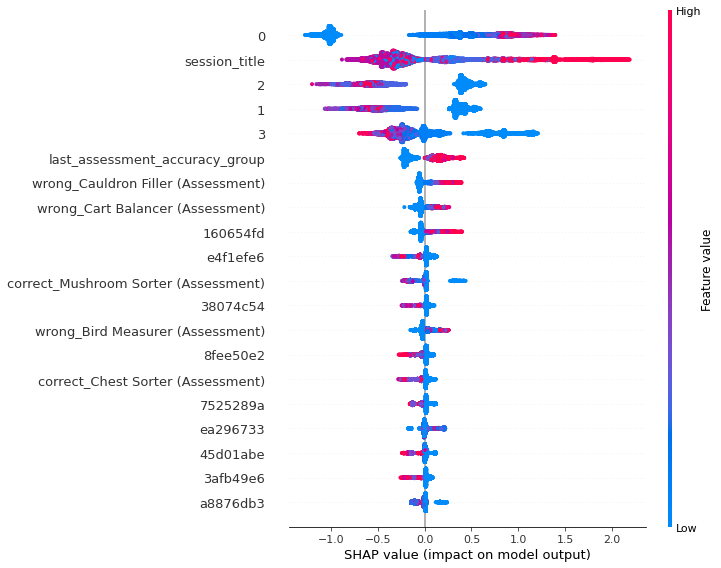

In [0]:
shap.summary_plot(shap_values[:,0], x_train_removed)

## Hyperparameter Tuning

### RandomizedSearchCV

In [0]:
parameters = {'depth': sp_randInt(4, 10),
                'learning_rate' : sp_randFloat(),
                'iterations'    : sp_randInt(10, 100),
                'random_seed' :sp_randInt(10, 200)
                 }

In [0]:
randm = RandomizedSearchCV(estimator=CatBoostClassifier(), param_distributions = parameters, 
                               cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(selected_df, y_train)
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          randm.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          randm.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          randm.best_params_)
    
print("\n ========================================================")

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


0:	learn: 0.8698571	total: 117ms	remaining: 10.7s
1:	learn: 0.7191864	total: 225ms	remaining: 10.1s
2:	learn: 0.6552527	total: 328ms	remaining: 9.73s
3:	learn: 0.6178433	total: 434ms	remaining: 9.55s
4:	learn: 0.5910541	total: 538ms	remaining: 9.36s
5:	learn: 0.5652730	total: 640ms	remaining: 9.17s
6:	learn: 0.5259523	total: 749ms	remaining: 9.09s
7:	learn: 0.5138511	total: 847ms	remaining: 8.89s
8:	learn: 0.5089448	total: 937ms	remaining: 8.64s
9:	learn: 0.5024374	total: 1.04s	remaining: 8.51s
10:	learn: 0.4994773	total: 1.13s	remaining: 8.34s
11:	learn: 0.4981007	total: 1.21s	remaining: 8.1s
12:	learn: 0.4948703	total: 1.31s	remaining: 7.94s
13:	learn: 0.4925368	total: 1.41s	remaining: 7.83s
14:	learn: 0.4847035	total: 1.5s	remaining: 7.7s
15:	learn: 0.4802888	total: 1.59s	remaining: 7.56s
16:	learn: 0.4776225	total: 1.69s	remaining: 7.43s
17:	learn: 0.4747700	total: 1.77s	remaining: 7.27s
18:	learn: 0.4708447	total: 1.86s	remaining: 7.16s
19:	learn: 0.4643929	total: 1.97s	remaining:

In [0]:
tuned_model = CatBoostClassifier(
    loss_function = 'MultiClass', 
    depth = 5,
    iterations=92, 
    learning_rate=0.5796826856646574, 
    random_seed=188)

In [0]:
catboost_tuned= tuned_model.fit(selected_df, y_train, verbose=False, plot=False)
predictions = catboost_tuned.predict(x_validation)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_validation, predictions)

0.8369135104578858

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_validation, predictions))
print('cohen kappa score:', cohen_kappa_score(y_validation, predictions))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       858
           1       0.78      0.71      0.74       490
           2       0.75      0.54      0.63       443
           3       0.85      0.93      0.89      1747

    accuracy                           0.84      3538
   macro avg       0.81      0.76      0.78      3538
weighted avg       0.83      0.84      0.83      3538

cohen kappa score: 0.747329973766665


### Gradient Boosting Param Search 

In [0]:
  from sklearn.model_selection import GridSearchCV

In [0]:
params = {'depth':[6,8,10],
          'iterations':[30, 50, 100],
          'learning_rate':[0.01, 0.05, 0.1], 
          'random_seed' :[100,150,190]}

In [0]:
grid = GridSearchCV(estimator=CatBoostRegressor(), param_grid = params, cv = 2, n_jobs=-1)
grid.fit(selected_df, y_train)    
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
print("\n ========================================================")

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


0:	learn: 1.1890969	total: 473ms	remaining: 46.8s
1:	learn: 1.1314054	total: 838ms	remaining: 41.1s
2:	learn: 1.0731070	total: 1.2s	remaining: 38.7s
3:	learn: 1.0279770	total: 1.55s	remaining: 37.3s
4:	learn: 0.9809939	total: 1.91s	remaining: 36.3s
5:	learn: 0.9486318	total: 2.27s	remaining: 35.6s
6:	learn: 0.9179205	total: 2.64s	remaining: 35s
7:	learn: 0.8872830	total: 3s	remaining: 34.5s
8:	learn: 0.8642297	total: 3.36s	remaining: 34s
9:	learn: 0.8434318	total: 3.72s	remaining: 33.5s
10:	learn: 0.8236971	total: 4.08s	remaining: 33s
11:	learn: 0.8013949	total: 4.44s	remaining: 32.6s
12:	learn: 0.7868283	total: 4.81s	remaining: 32.2s
13:	learn: 0.7743056	total: 5.17s	remaining: 31.7s
14:	learn: 0.7609045	total: 5.53s	remaining: 31.3s
15:	learn: 0.7512284	total: 5.88s	remaining: 30.9s
16:	learn: 0.7440460	total: 6.25s	remaining: 30.5s
17:	learn: 0.7357374	total: 6.61s	remaining: 30.1s
18:	learn: 0.7307788	total: 6.97s	remaining: 29.7s
19:	learn: 0.7165487	total: 7.33s	remaining: 29.3s


In [0]:
grid_tuned_model = CatBoostClassifier(
    loss_function = 'MultiClass', 
    depth = 10,
    iterations=100, 
    learning_rate=0.1, 
    random_seed=100)

In [0]:
catboost_tuned_grid= grid_tuned_model.fit(selected_df, y_train, verbose=False, plot=False)
predictions = catboost_tuned_grid.predict(x_validation)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_validation, predictions)

0.848

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_validation, predictions))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       716
           1       0.58      0.72      0.64        39
           2       0.60      0.59      0.59        41
           3       0.66      0.97      0.78       204

    accuracy                           0.85      1000
   macro avg       0.70      0.78      0.73      1000
weighted avg       0.88      0.85      0.85      1000

